In [1]:
#importing necessary packages

import scipy as sp
import numpy as np
import pandas as pd
import pandas_profiling as pp
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from imblearn.metrics import classification_report_imbalanced
from matplotlib import pyplot as plt
import random

#set seed
random.seed(420)

#loading csv into dataframe

url = 'https://raw.githubusercontent.com/shantanudeshpande94/bankruptcy-prediction/master/5year.csv'
bankruptcy_df = pd.read_csv(url)

Using TensorFlow backend.


(5910, 65)

In [3]:
#to replace '?' with NA values

bankruptcy_df.replace({'?': None},inplace =True)

In [4]:
#to check null values in a column

bankruptcy_df.isna().sum()

Attr1       3
Attr2       3
Attr3       3
Attr4      21
Attr5      11
         ... 
Attr61     15
Attr62      0
Attr63     21
Attr64    107
class       0
Length: 65, dtype: int64

In [6]:
bankruptcy_df.dtypes

Attr1      object
Attr2      object
Attr3      object
Attr4      object
Attr5      object
           ...   
Attr61     object
Attr62    float64
Attr63     object
Attr64     object
class       int64
Length: 65, dtype: object

In [7]:
#converting from object to float64

bankruptcy_df['Attr1'] = pd.to_numeric(bankruptcy_df['Attr1'])
bankruptcy_df['Attr2'] = pd.to_numeric(bankruptcy_df['Attr2'])
bankruptcy_df['Attr3'] = pd.to_numeric(bankruptcy_df['Attr3'])
bankruptcy_df['Attr4'] = pd.to_numeric(bankruptcy_df['Attr4'])
bankruptcy_df['Attr5'] = pd.to_numeric(bankruptcy_df['Attr5'])
bankruptcy_df['Attr6'] = pd.to_numeric(bankruptcy_df['Attr6'])
bankruptcy_df['Attr7'] = pd.to_numeric(bankruptcy_df['Attr7'])
bankruptcy_df['Attr8'] = pd.to_numeric(bankruptcy_df['Attr8'])
bankruptcy_df['Attr9'] = pd.to_numeric(bankruptcy_df['Attr9'])
bankruptcy_df['Attr10'] = pd.to_numeric(bankruptcy_df['Attr10'])
bankruptcy_df['Attr11'] = pd.to_numeric(bankruptcy_df['Attr11'])
bankruptcy_df['Attr12'] = pd.to_numeric(bankruptcy_df['Attr12'])
bankruptcy_df['Attr13'] = pd.to_numeric(bankruptcy_df['Attr13'])
bankruptcy_df['Attr14'] = pd.to_numeric(bankruptcy_df['Attr14'])
bankruptcy_df['Attr15'] = pd.to_numeric(bankruptcy_df['Attr15'])
bankruptcy_df['Attr16'] = pd.to_numeric(bankruptcy_df['Attr16'])
bankruptcy_df['Attr17'] = pd.to_numeric(bankruptcy_df['Attr17'])
bankruptcy_df['Attr18'] = pd.to_numeric(bankruptcy_df['Attr18'])
bankruptcy_df['Attr19'] = pd.to_numeric(bankruptcy_df['Attr19'])
bankruptcy_df['Attr20'] = pd.to_numeric(bankruptcy_df['Attr20'])
bankruptcy_df['Attr21'] = pd.to_numeric(bankruptcy_df['Attr21'])
bankruptcy_df['Attr22'] = pd.to_numeric(bankruptcy_df['Attr22'])
bankruptcy_df['Attr23'] = pd.to_numeric(bankruptcy_df['Attr23'])
bankruptcy_df['Attr24'] = pd.to_numeric(bankruptcy_df['Attr24'])
bankruptcy_df['Attr25'] = pd.to_numeric(bankruptcy_df['Attr25'])
bankruptcy_df['Attr26'] = pd.to_numeric(bankruptcy_df['Attr26'])
bankruptcy_df['Attr27'] = pd.to_numeric(bankruptcy_df['Attr27'])
bankruptcy_df['Attr28'] = pd.to_numeric(bankruptcy_df['Attr28'])
bankruptcy_df['Attr29'] = pd.to_numeric(bankruptcy_df['Attr29'])
bankruptcy_df['Attr30'] = pd.to_numeric(bankruptcy_df['Attr30'])
bankruptcy_df['Attr31'] = pd.to_numeric(bankruptcy_df['Attr31'])
bankruptcy_df['Attr32'] = pd.to_numeric(bankruptcy_df['Attr32'])
bankruptcy_df['Attr33'] = pd.to_numeric(bankruptcy_df['Attr33'])
bankruptcy_df['Attr34'] = pd.to_numeric(bankruptcy_df['Attr34'])
bankruptcy_df['Attr35'] = pd.to_numeric(bankruptcy_df['Attr35'])
bankruptcy_df['Attr36'] = pd.to_numeric(bankruptcy_df['Attr36'])
bankruptcy_df['Attr37'] = pd.to_numeric(bankruptcy_df['Attr37'])
bankruptcy_df['Attr38'] = pd.to_numeric(bankruptcy_df['Attr38'])
bankruptcy_df['Attr39'] = pd.to_numeric(bankruptcy_df['Attr39'])
bankruptcy_df['Attr40'] = pd.to_numeric(bankruptcy_df['Attr40'])
bankruptcy_df['Attr41'] = pd.to_numeric(bankruptcy_df['Attr41'])
bankruptcy_df['Attr42'] = pd.to_numeric(bankruptcy_df['Attr42'])
bankruptcy_df['Attr43'] = pd.to_numeric(bankruptcy_df['Attr43'])
bankruptcy_df['Attr44'] = pd.to_numeric(bankruptcy_df['Attr44'])
bankruptcy_df['Attr45'] = pd.to_numeric(bankruptcy_df['Attr45'])
bankruptcy_df['Attr46'] = pd.to_numeric(bankruptcy_df['Attr46'])
bankruptcy_df['Attr47'] = pd.to_numeric(bankruptcy_df['Attr47'])
bankruptcy_df['Attr48'] = pd.to_numeric(bankruptcy_df['Attr48'])
bankruptcy_df['Attr49'] = pd.to_numeric(bankruptcy_df['Attr49'])
bankruptcy_df['Attr50'] = pd.to_numeric(bankruptcy_df['Attr50'])
bankruptcy_df['Attr51'] = pd.to_numeric(bankruptcy_df['Attr51'])
bankruptcy_df['Attr52'] = pd.to_numeric(bankruptcy_df['Attr52'])
bankruptcy_df['Attr53'] = pd.to_numeric(bankruptcy_df['Attr53'])
bankruptcy_df['Attr54'] = pd.to_numeric(bankruptcy_df['Attr54'])
bankruptcy_df['Attr55'] = pd.to_numeric(bankruptcy_df['Attr55'])
bankruptcy_df['Attr56'] = pd.to_numeric(bankruptcy_df['Attr56'])
bankruptcy_df['Attr57'] = pd.to_numeric(bankruptcy_df['Attr57'])
bankruptcy_df['Attr58'] = pd.to_numeric(bankruptcy_df['Attr58'])
bankruptcy_df['Attr59'] = pd.to_numeric(bankruptcy_df['Attr59'])
bankruptcy_df['Attr60'] = pd.to_numeric(bankruptcy_df['Attr60'])
bankruptcy_df['Attr61'] = pd.to_numeric(bankruptcy_df['Attr61'])
bankruptcy_df['Attr62'] = pd.to_numeric(bankruptcy_df['Attr62'])
bankruptcy_df['Attr63'] = pd.to_numeric(bankruptcy_df['Attr63'])
bankruptcy_df['Attr64'] = pd.to_numeric(bankruptcy_df['Attr64'])

bankruptcy_df.dtypes

bankruptcy_df.mean()


Attr1      -0.022347
Attr2       0.465086
Attr3       0.189155
Attr4       4.892476
Attr5      19.406758
             ...    
Attr61     10.941497
Attr62    241.978184
Attr63      9.127741
Attr64     65.276716
class       0.069374
Length: 65, dtype: float64

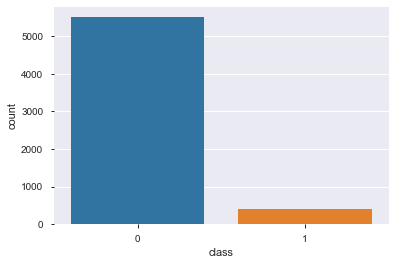

In [10]:
import seaborn as sns
sns.countplot(bankruptcy_df['class'])